In [ ]:
#Edgar Moises Hernandez-Gonzalez
#26/06/19
#MLP con Keras ejemplo de https://www.tensorflow.org/tutorials/keras/basic_classification?hl=es

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [4]:
print(tf.__version__)

1.13.1


In [5]:
#importar los datos
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [6]:
#clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
#explorar los datos
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


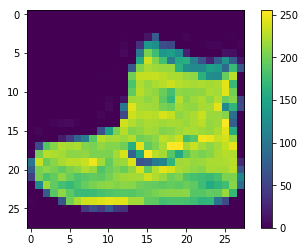

In [12]:
#Ver la primer imagen
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
#Preprocesamiento
#Escalar los valores en un rango de 0 a 1
train_images = train_images / 255.0
test_images = test_images / 255.0

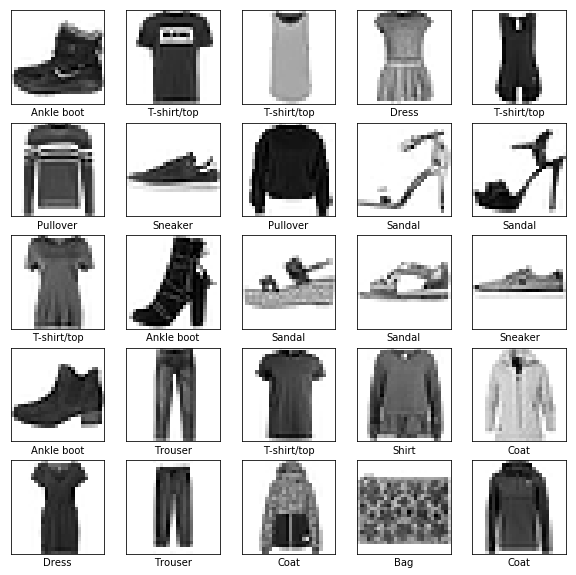

In [18]:
#mostrar las primeras 25 imagenes
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
#construir el modelo, MLP
model=keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), #de 2D a 1D (convertir la matriz a vector)
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
#compilar el modelo
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
             )

In [21]:
#entrenar el modelo
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4978 - acc: 0.82390s - loss: 0.5062 - acc:
Epoch 2/5
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3739 - acc: 0.8653
Epoch 3/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.3360 - acc: 0.8762
Epoch 4/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.3116 - acc: 0.8858
Epoch 5/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2941 - acc: 0.8907


In [22]:
#accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/sample - loss: 0.3839 - acc: 0.8619
Accuracy: 0.8619


In [30]:
#predicciones con el conjunto de prueba
predictions = model.predict(test_images)
print('Primer prediccion:', predictions[0])
print('Max:', np.argmax(predictions[0]))
print('Etiqueta:', test_labels[0])

Primer prediccion: [1.5427302e-04 1.4660212e-06 1.9624679e-06 4.3645909e-07 3.2377000e-05
 2.1176741e-02 1.5848438e-05 4.0652342e-02 1.3620994e-03 9.3660247e-01]
Max: 9
Etiqueta: 9


In [31]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

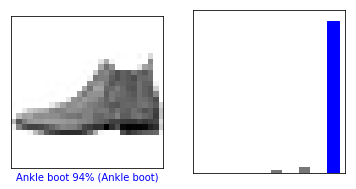

In [32]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

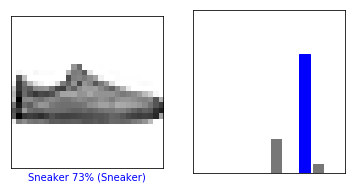

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

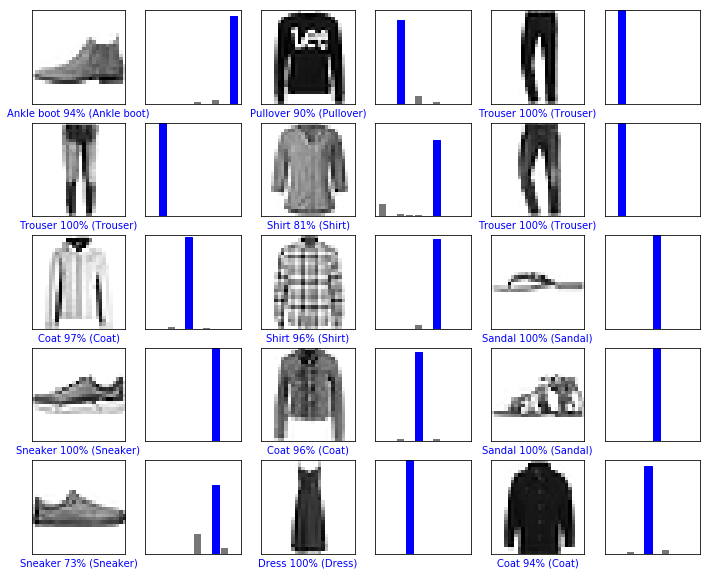

In [34]:
#Graficar imagenes, etiqueta predicha y etiqueta verdadera
#Correcta en azul, incorrecta en rojo
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

In [35]:
#prediccion sobre una sola imagen
img = test_images[0]
print(img.shape)

img = (np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

(28, 28)
(1, 28, 28)
[[1.5427271e-04 1.4660185e-06 1.9624717e-06 4.3645909e-07 3.2376975e-05
  2.1176746e-02 1.5848453e-05 4.0652361e-02 1.3620981e-03 9.3660247e-01]]


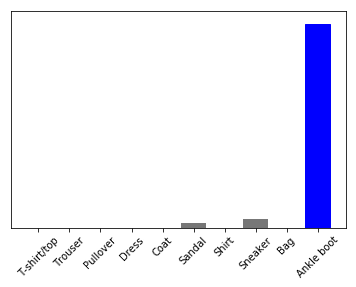

In [36]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [37]:
print(np.argmax(predictions_single[0]))

9
